In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sys
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

tf.logging.set_verbosity(old_v)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
learning_rate = 0.05
epoch = 1001
batch_size = 100

In [3]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [4]:
##隨機初始權值W與偏置項b
# x = tf.placeholder(tf.float32, [None, 784])
# W = tf.Variable(tf.random_normal([784,10]))
# b = tf.Variable(tf.random_normal([10]))
# y = tf.matmul(x, W) + b
# y_ = tf.placeholder(tf.float32, [None, 10])
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
# correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

epoch : 100 loss = 0.8761635
accuracy: 0.8499


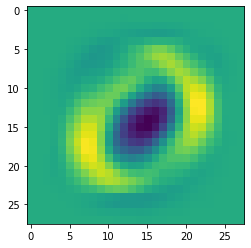

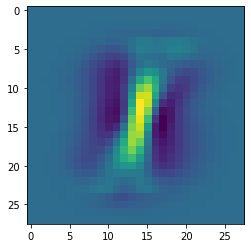

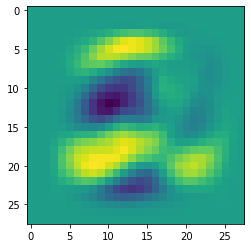

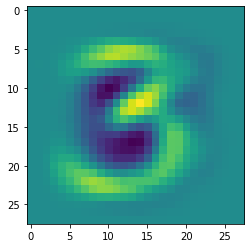

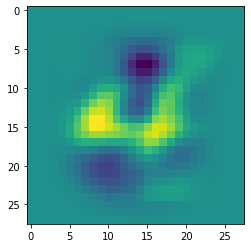

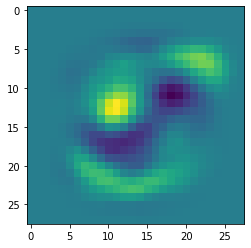

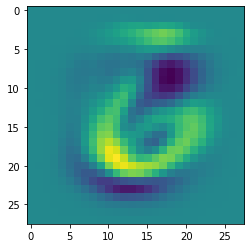

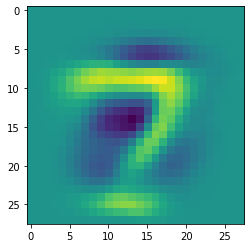

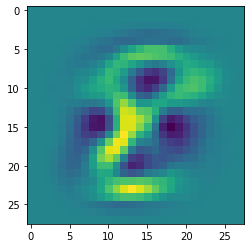

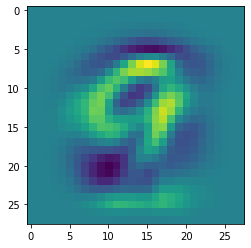

epoch : 200 loss = 0.5474054
accuracy: 0.8678


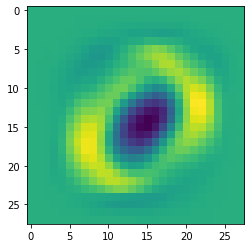

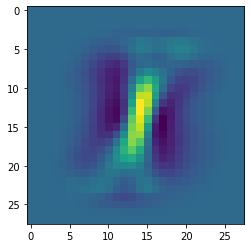

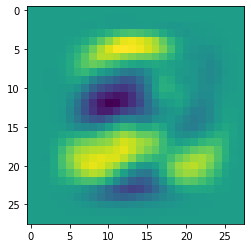

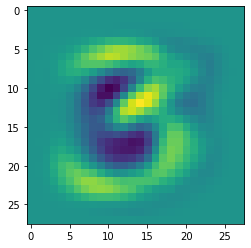

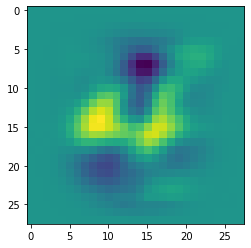

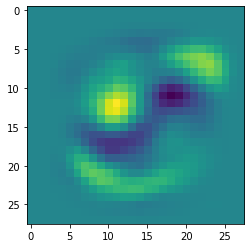

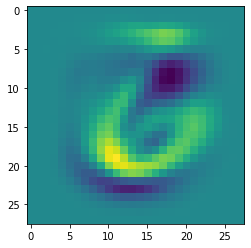

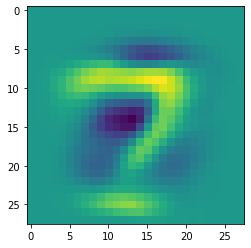

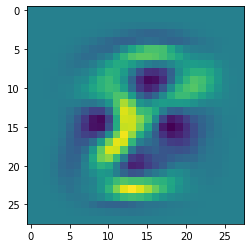

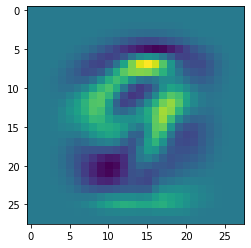

epoch : 300 loss = 0.645093
accuracy: 0.8802


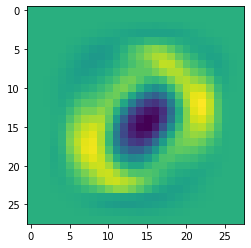

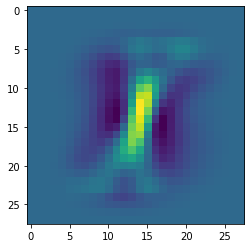

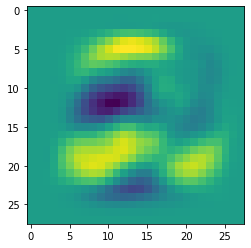

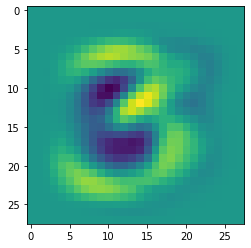

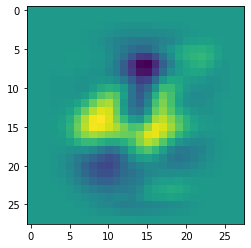

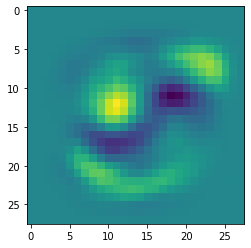

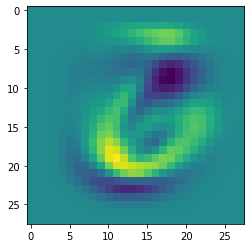

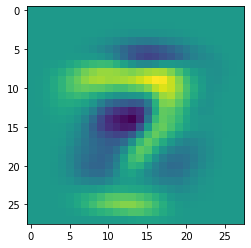

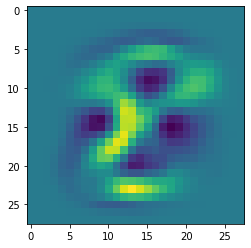

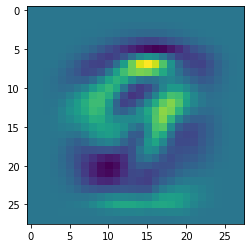

epoch : 400 loss = 0.40696526
accuracy: 0.8843


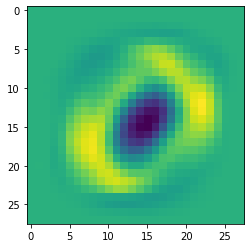

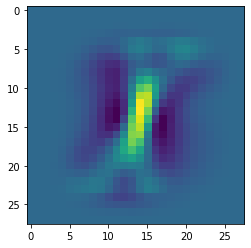

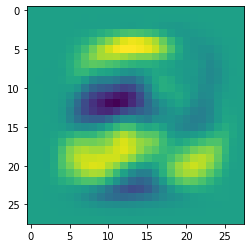

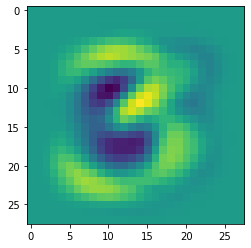

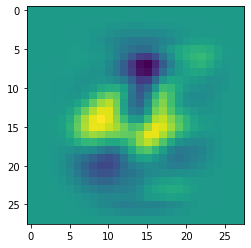

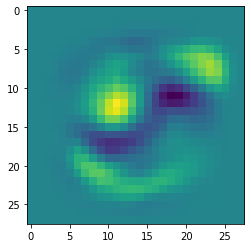

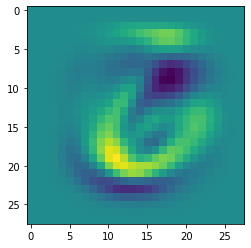

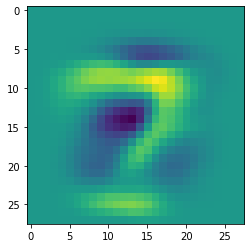

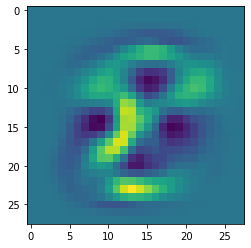

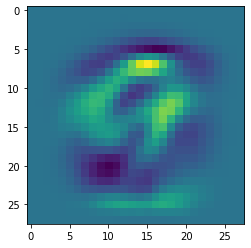

epoch : 500 loss = 0.5513038
accuracy: 0.889


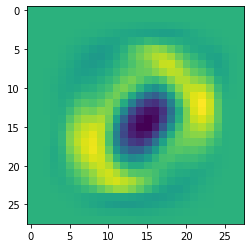

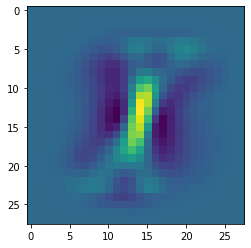

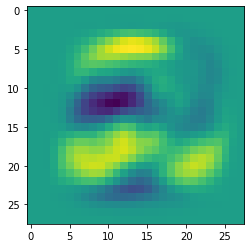

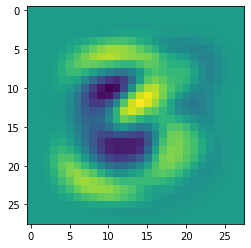

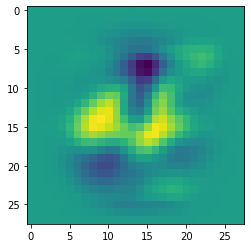

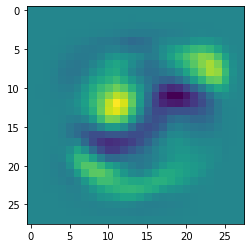

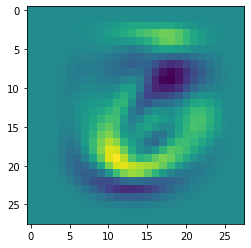

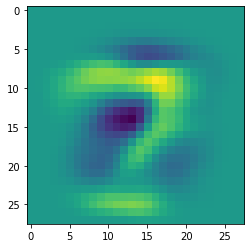

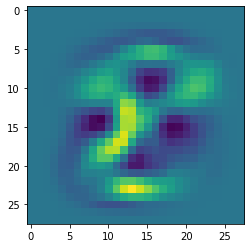

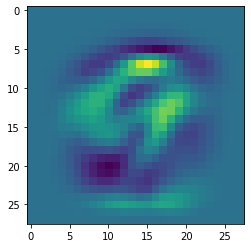

epoch : 600 loss = 0.5134673
accuracy: 0.8915


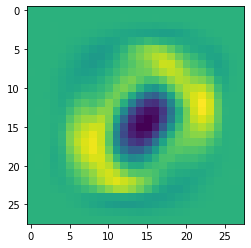

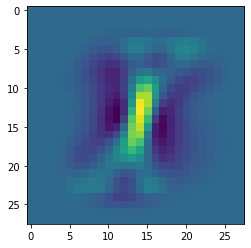

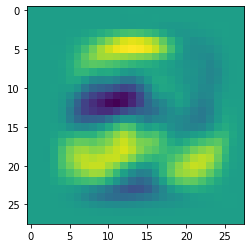

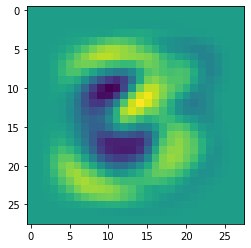

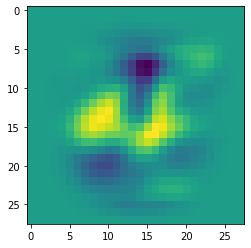

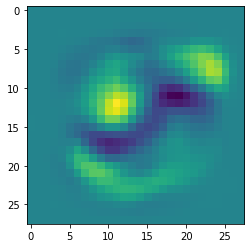

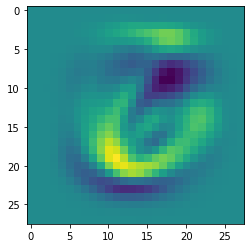

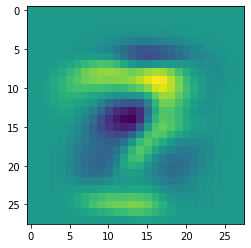

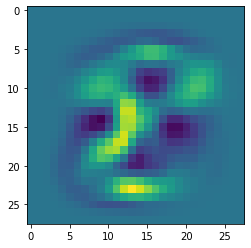

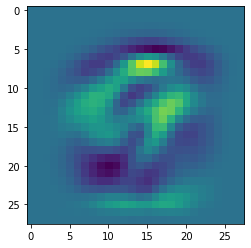

epoch : 700 loss = 0.3265636
accuracy: 0.8958


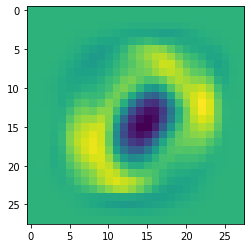

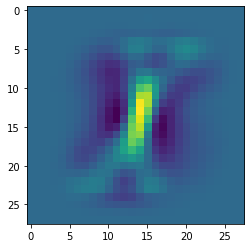

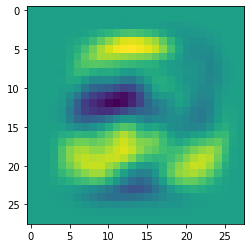

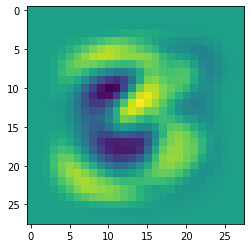

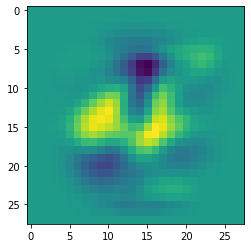

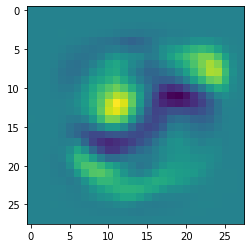

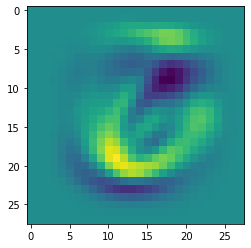

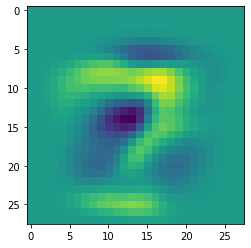

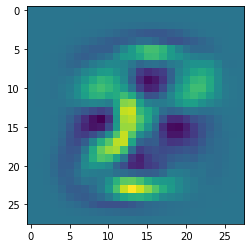

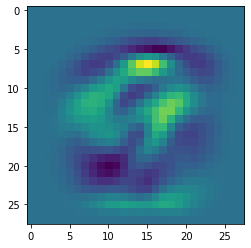

epoch : 800 loss = 0.4375158
accuracy: 0.8982


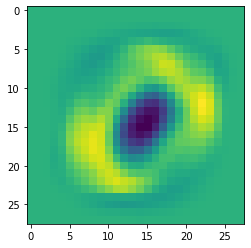

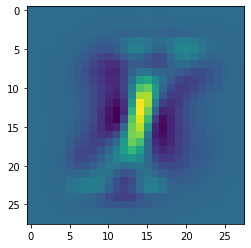

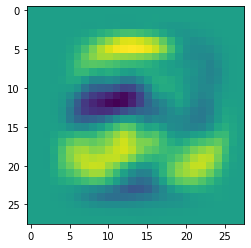

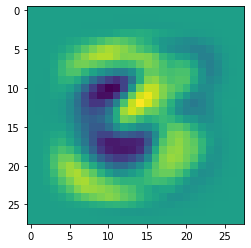

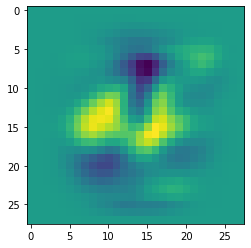

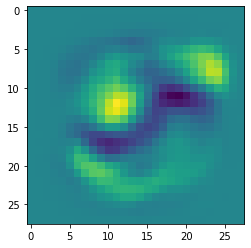

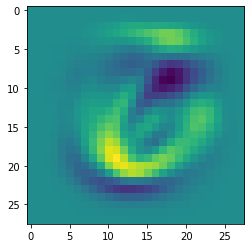

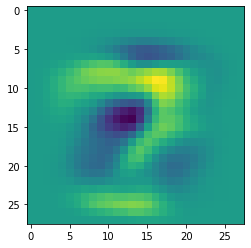

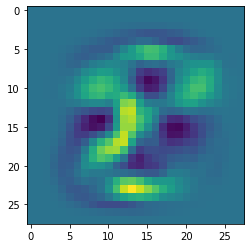

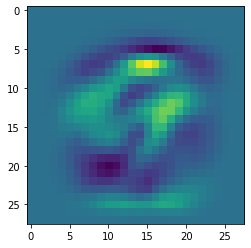

epoch : 900 loss = 0.26285216
accuracy: 0.8979


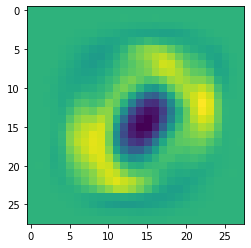

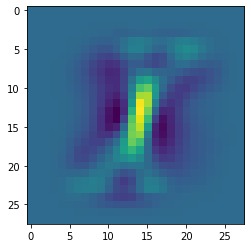

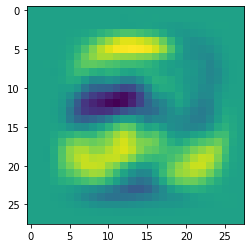

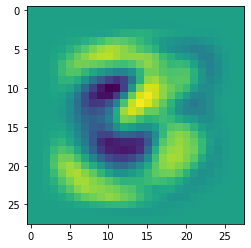

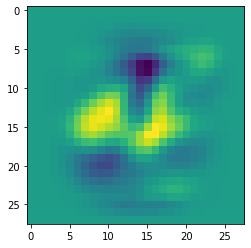

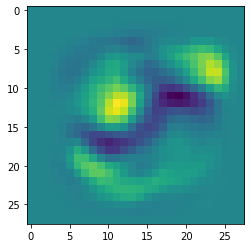

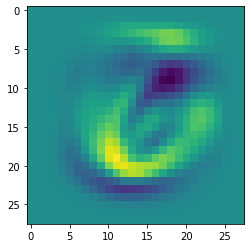

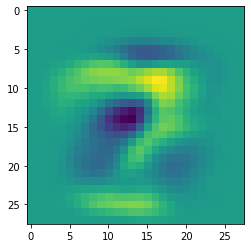

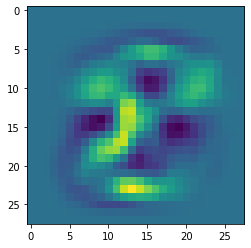

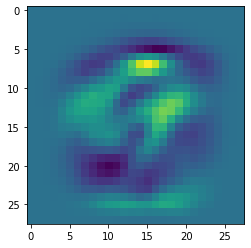

epoch : 1000 loss = 0.3717647
accuracy: 0.9017


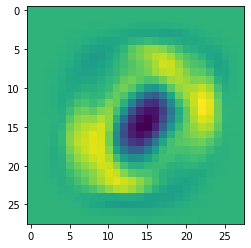

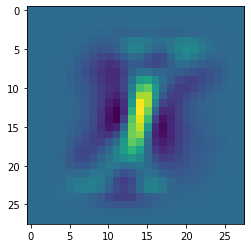

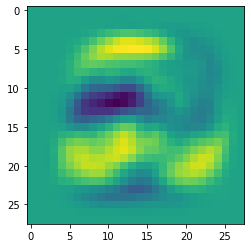

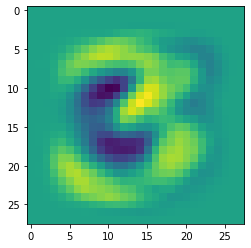

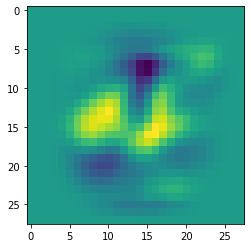

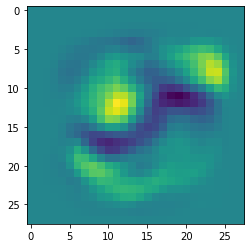

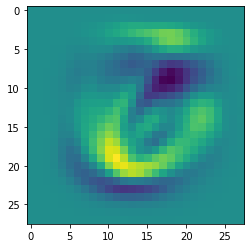

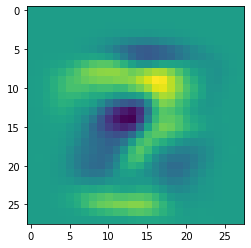

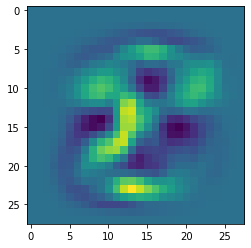

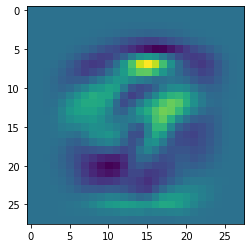

In [5]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if(e%100==0 and e!=0):  
        print ("epoch :",e,'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        for i in range(10):  # 繪製10個隱層神經元與輸入層神經元個之間的權重
            im=W_val[:,i].reshape(28,28)  #把矩陣的每一列 變化層 28*28 的矩陣
            plt.imshow(im
#                        , cmap = 'Greys'
                      )  #繪圖
            plt.show()

In [6]:
# x = tf.placeholder(tf.float32, [None, 784])
# y_actual = tf.placeholder(tf.float32, shape=[None, 10])
# W1 = tf.Variable(tf.zeros([784, 10]))        #初始化權值W
# b1 = tf.Variable(tf.zeros([10]))           #初始化偏置項b
# layer1=tf.nn.sigmoid(tf.matmul(x,W1) + b1)
# y_predict = tf.nn.softmax(layer1)     #加權變換並進行softmax迴歸，得到預測概率
# regularizer=tf.contrib.layers.l2_regularizer(0.05) 
# regloss=regularizer(W1)
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_actual*tf.log(y_predict),reduction_indices=1))   #損失函式為交叉熵
# totalloss=cross_entropy+regloss

In [7]:
x = tf.placeholder(tf.float32, [None, 784])
y_= tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784, 10]))                                               #初始化權值W
b = tf.Variable(tf.zeros([10]))                                                    #初始化偏置項b
layer1=tf.nn.leaky_relu(tf.matmul(x,W) + b)
y = tf.nn.softmax(layer1)                                                          #加權變換並進行softmax迴歸，得到預測概率
regularizer=tf.contrib.layers.l2_regularizer(0.05) 
regloss=regularizer(W)
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=1))   #損失函式為交叉熵
totalloss=cross_entropy+regloss

epoch : 100 loss = 0.97535956
accuracy: 0.8408


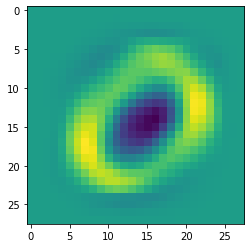

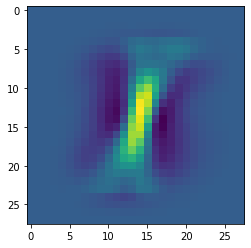

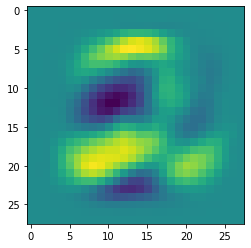

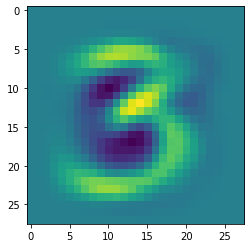

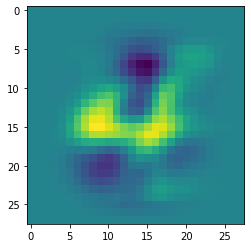

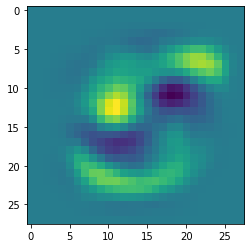

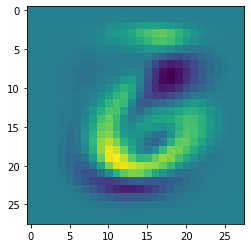

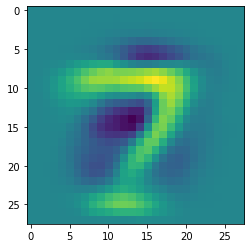

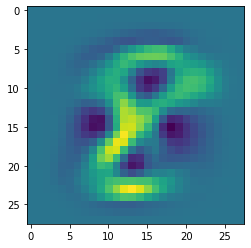

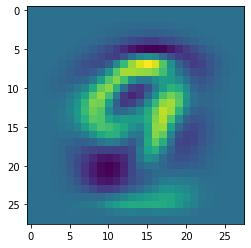

epoch : 200 loss = 0.7547341
accuracy: 0.867


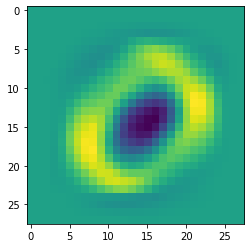

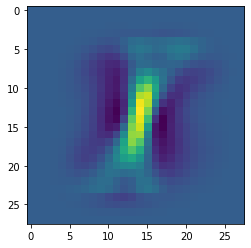

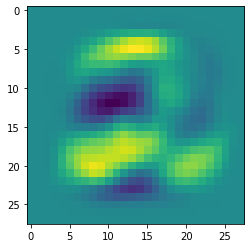

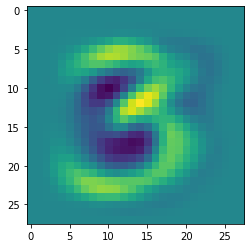

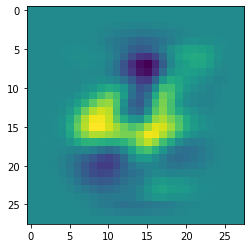

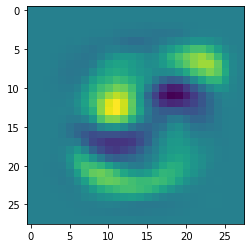

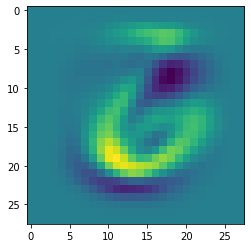

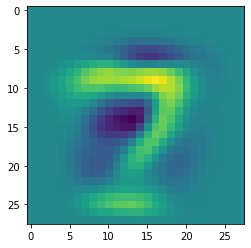

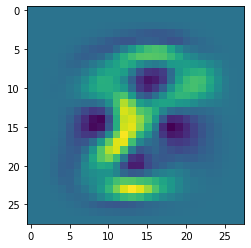

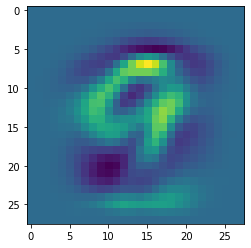

epoch : 300 loss = 0.5834232
accuracy: 0.8711


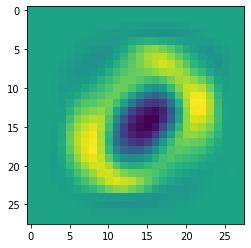

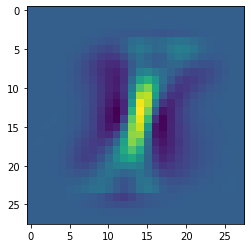

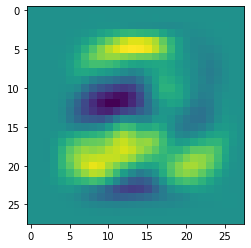

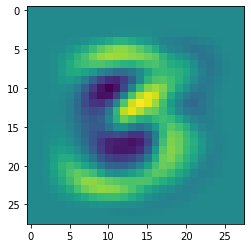

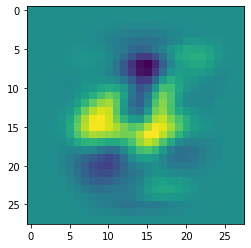

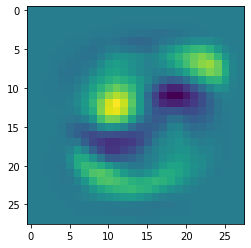

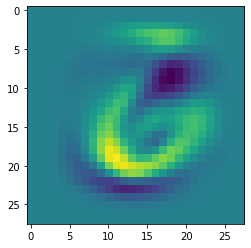

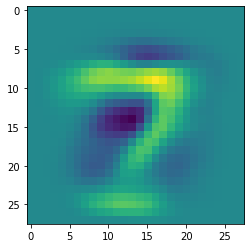

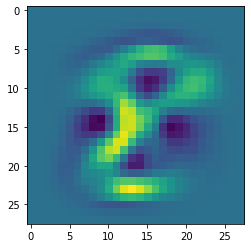

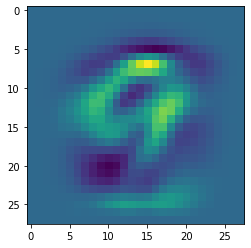

epoch : 400 loss = 0.6396775
accuracy: 0.8761


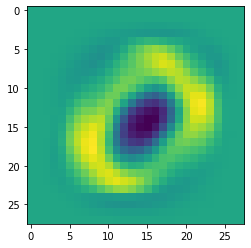

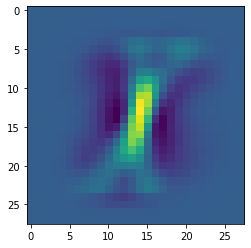

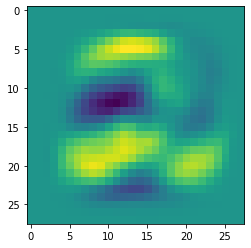

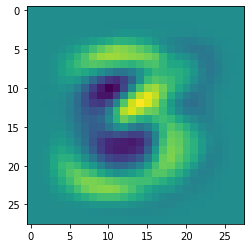

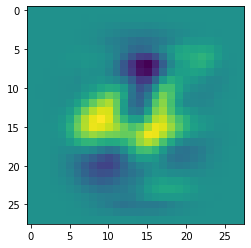

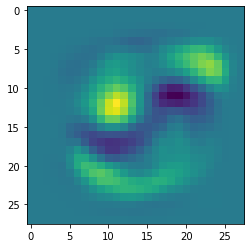

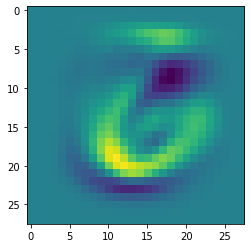

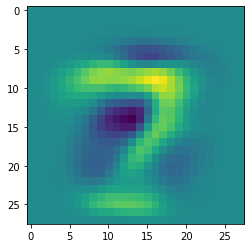

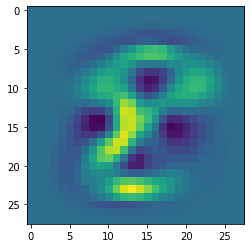

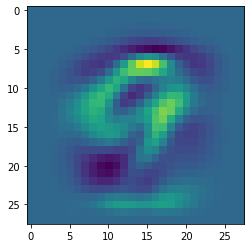

epoch : 500 loss = 0.6826009
accuracy: 0.8771


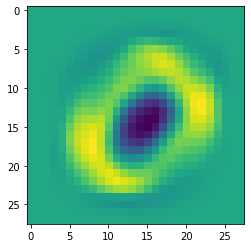

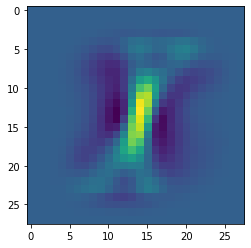

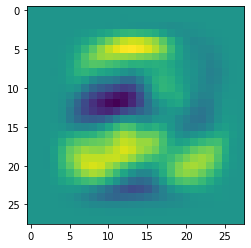

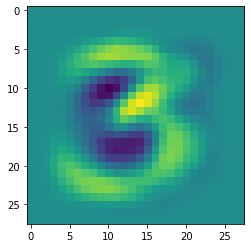

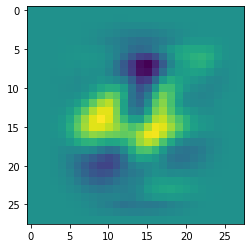

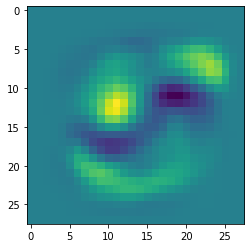

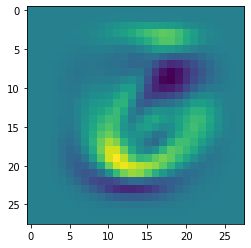

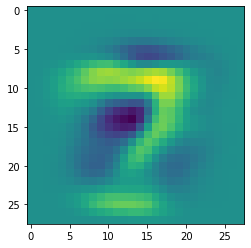

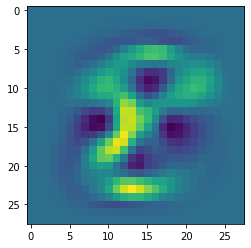

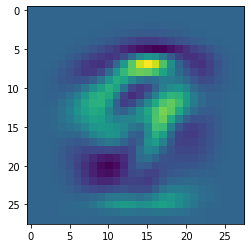

epoch : 600 loss = 0.71436846
accuracy: 0.8845


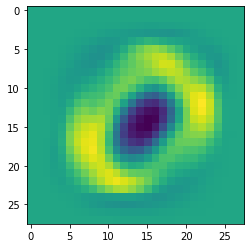

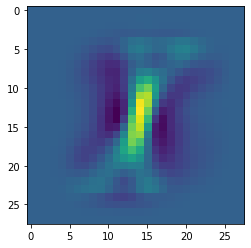

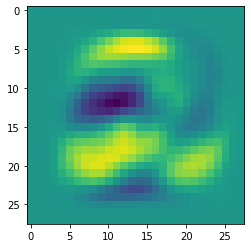

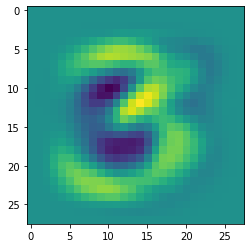

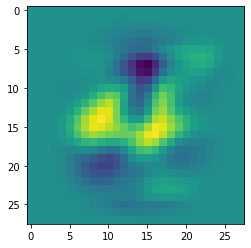

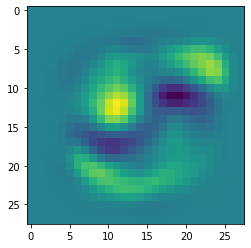

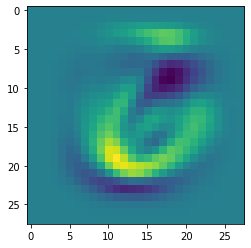

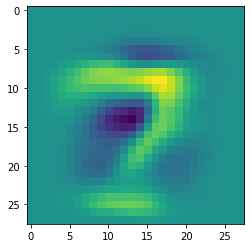

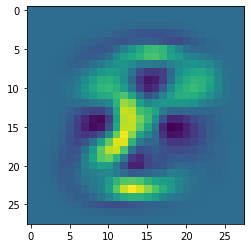

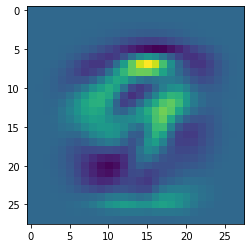

epoch : 700 loss = 0.55535567
accuracy: 0.8822


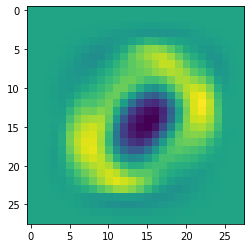

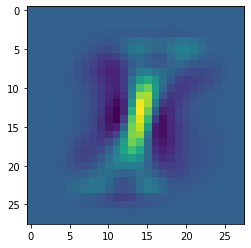

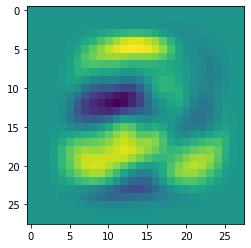

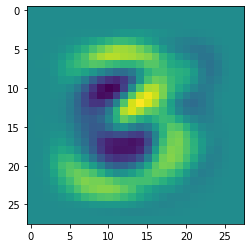

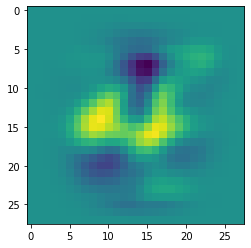

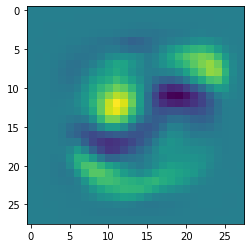

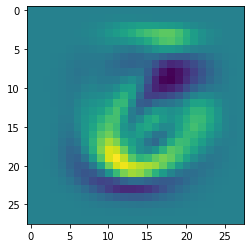

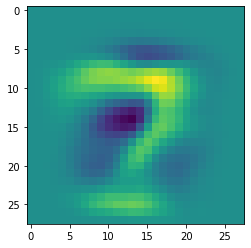

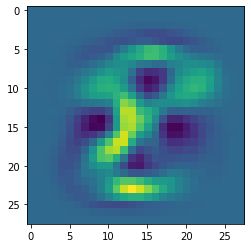

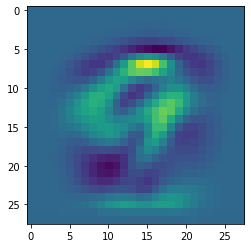

epoch : 800 loss = 0.68988156
accuracy: 0.8816


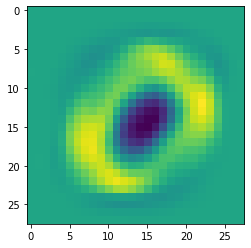

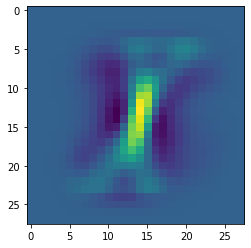

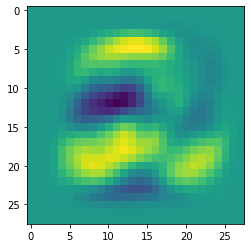

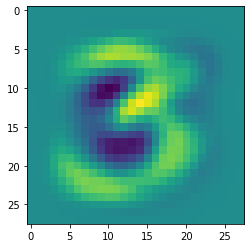

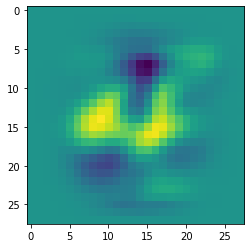

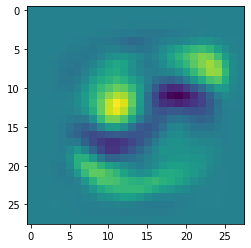

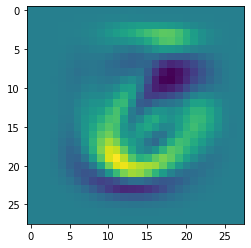

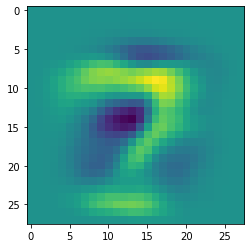

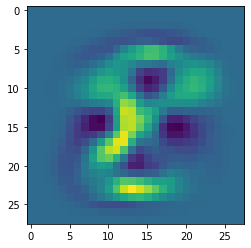

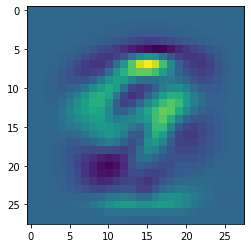

epoch : 900 loss = 0.64454836
accuracy: 0.8827


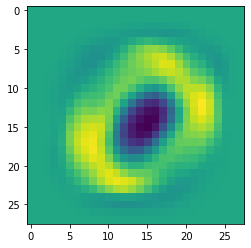

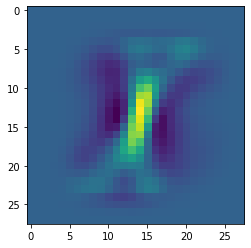

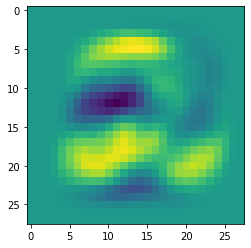

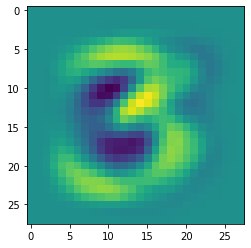

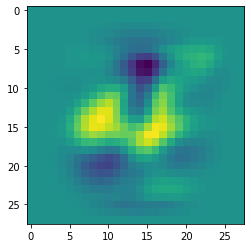

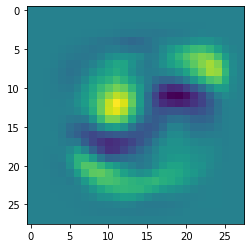

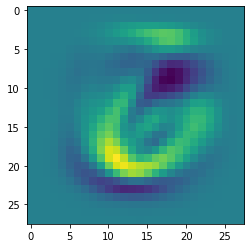

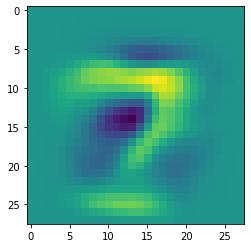

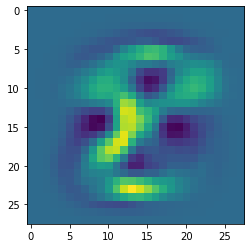

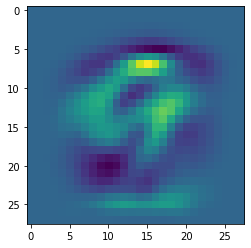

epoch : 1000 loss = 0.66268563
accuracy: 0.8849


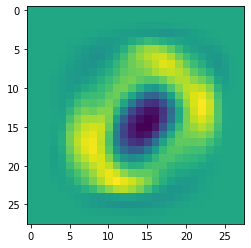

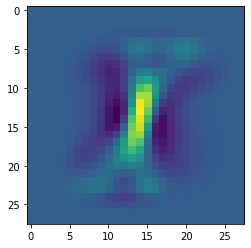

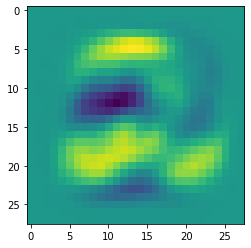

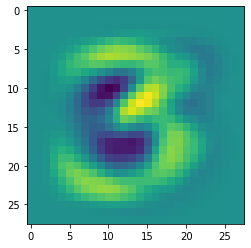

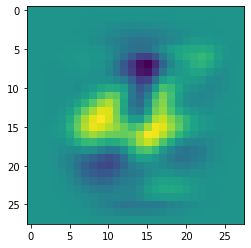

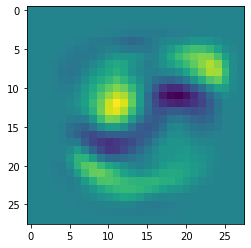

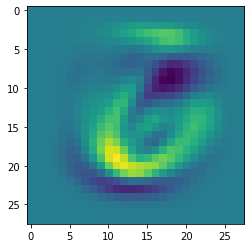

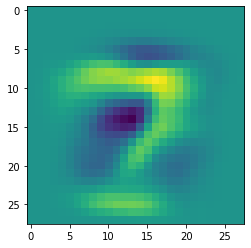

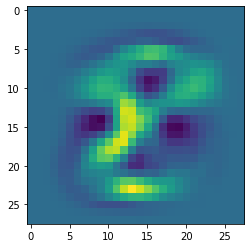

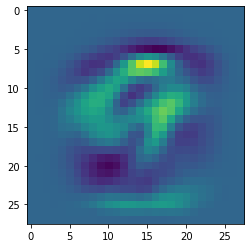

In [8]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(totalloss)   
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))             #在測試階段，測試準確度計算
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))         #多個批次的準確度均值

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if(e%100==0 and e!=0):  
        print ("epoch :",e,'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        for i in range(10):  # 繪製10個隱層神經元與輸入層神經元個之間的權重
            im=W_val[:,i].reshape(28,28)  #把矩陣的每一列 變化層 28*28 的矩陣
            plt.imshow(im)  #繪圖
            plt.show()

In [9]:
x = tf.placeholder(tf.float32, [None, 784])
y_= tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784, 10]))                                               #初始化權值W
b = tf.Variable(tf.zeros([10]))                                                    #初始化偏置項b
layer1=tf.nn.elu(tf.matmul(x,W) + b)
y = tf.nn.softmax(layer1)                                                          #加權變換並進行softmax迴歸，得到預測概率
regularizer=tf.contrib.layers.l2_regularizer(0.05) 
regloss=regularizer(W)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=1))   #損失函式為交叉熵
totalloss=cross_entropy+regloss

epoch : 100 loss = 2.2122304
accuracy: 0.5063


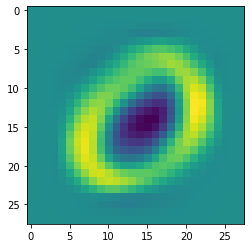

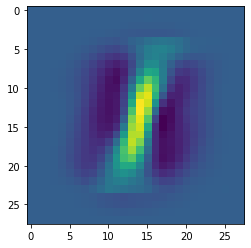

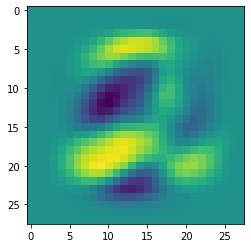

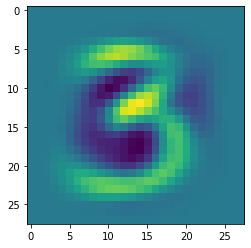

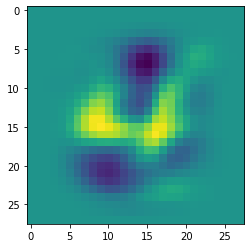

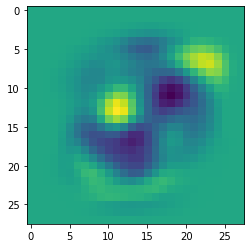

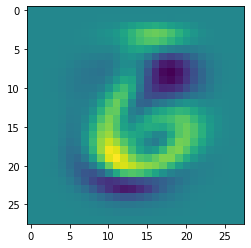

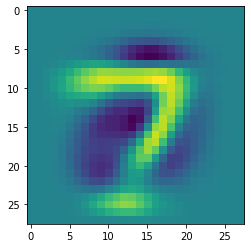

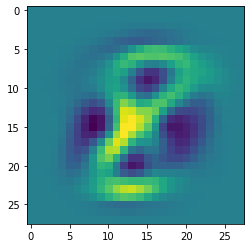

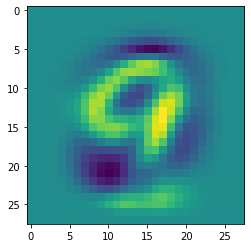

epoch : 200 loss = 2.0735543
accuracy: 0.582


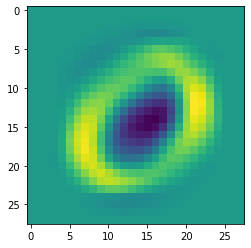

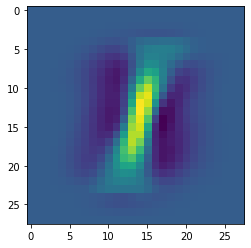

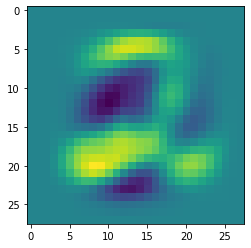

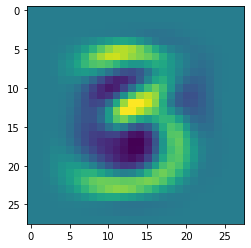

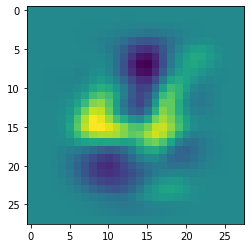

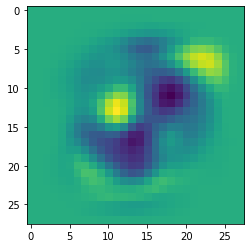

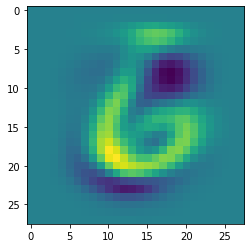

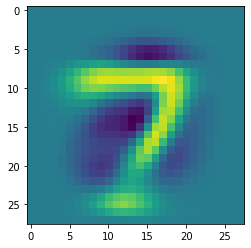

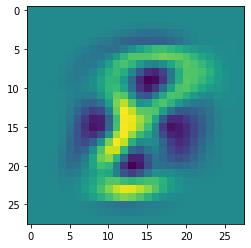

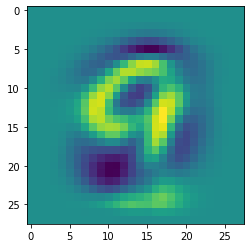

epoch : 300 loss = 2.031986
accuracy: 0.6483


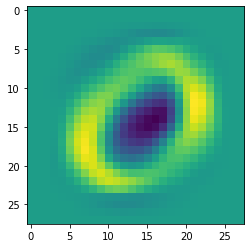

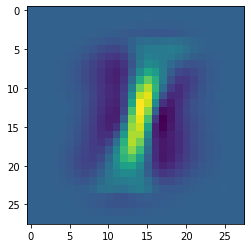

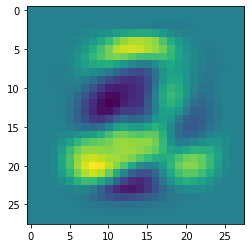

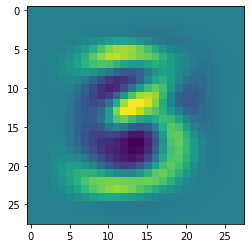

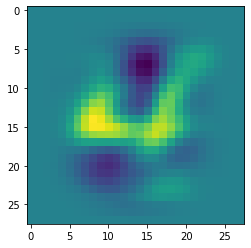

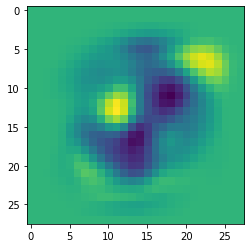

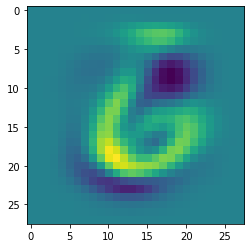

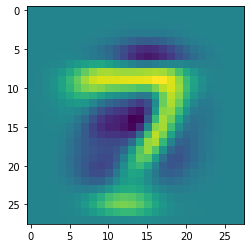

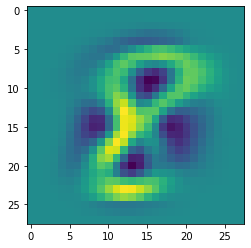

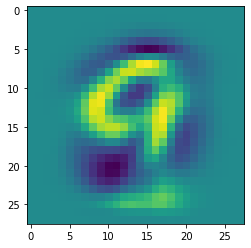

epoch : 400 loss = 1.9927428
accuracy: 0.6645


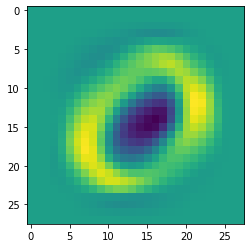

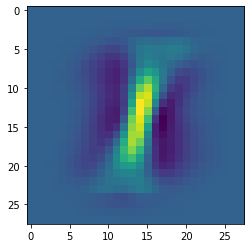

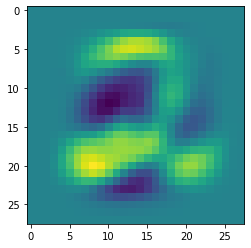

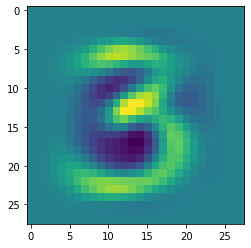

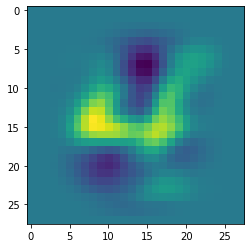

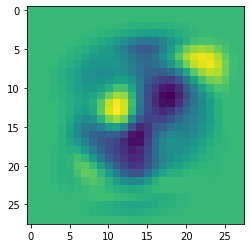

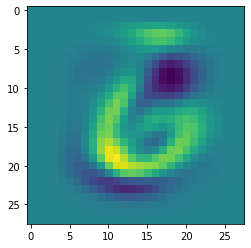

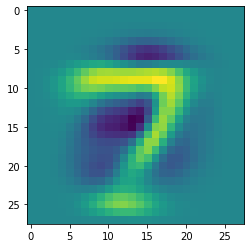

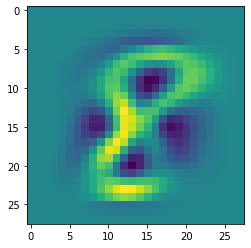

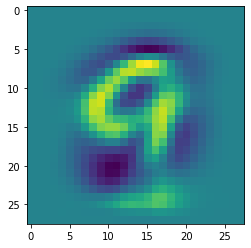

epoch : 500 loss = 1.976794
accuracy: 0.7055


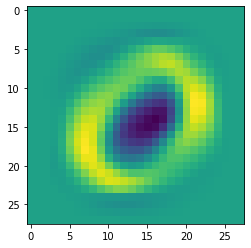

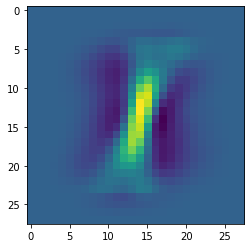

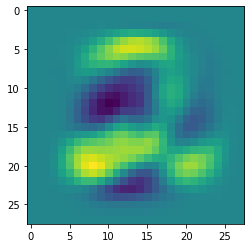

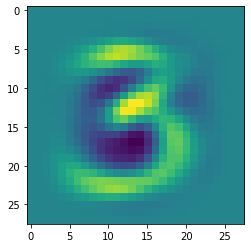

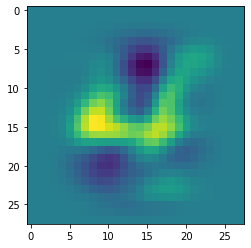

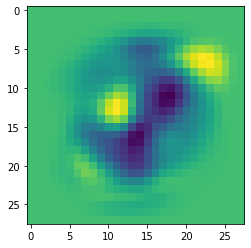

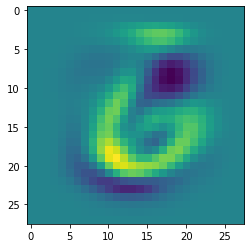

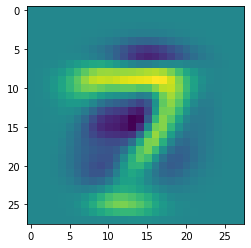

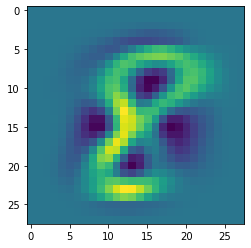

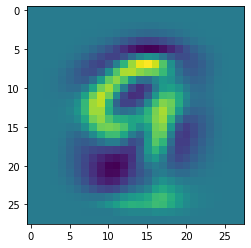

epoch : 600 loss = 1.9430717
accuracy: 0.7172


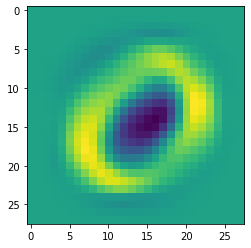

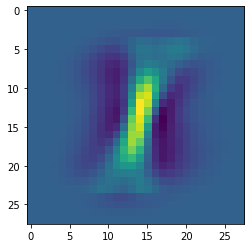

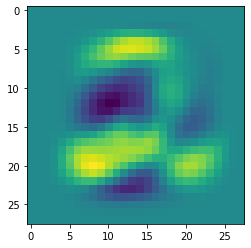

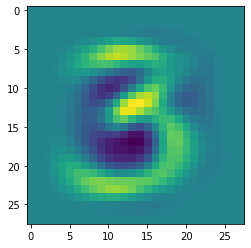

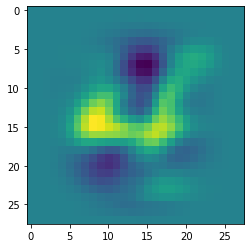

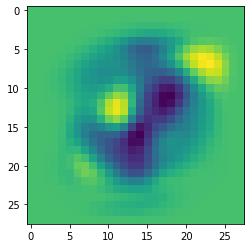

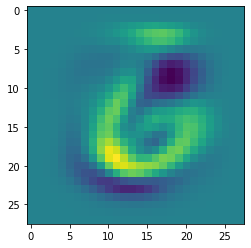

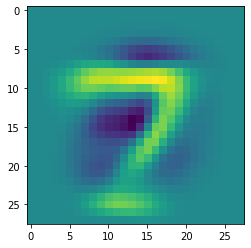

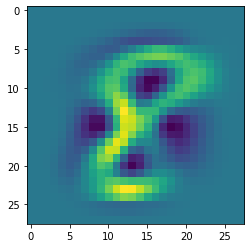

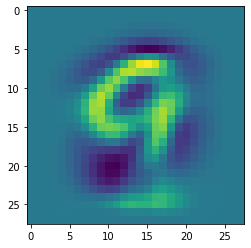

epoch : 700 loss = 1.9840686
accuracy: 0.7324


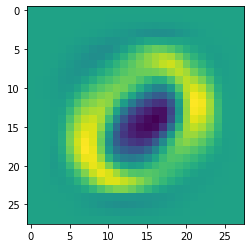

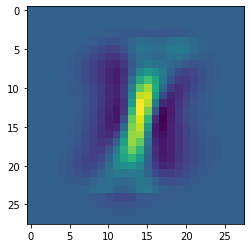

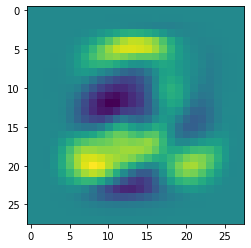

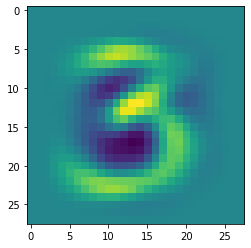

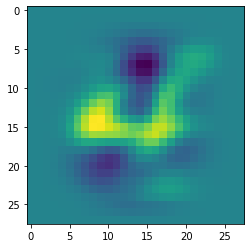

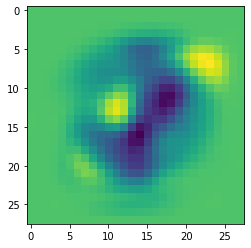

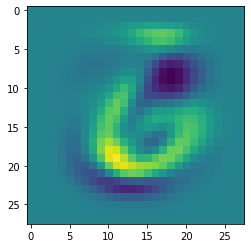

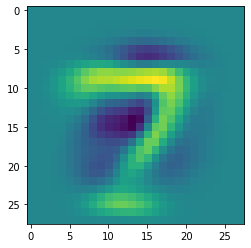

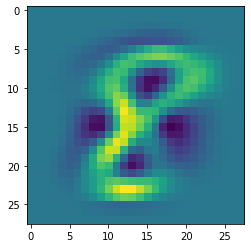

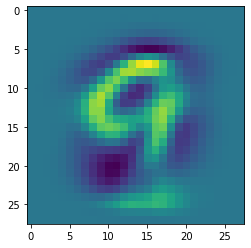

epoch : 800 loss = 1.9401835
accuracy: 0.7572


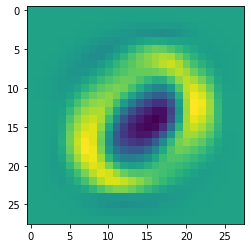

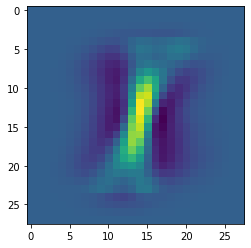

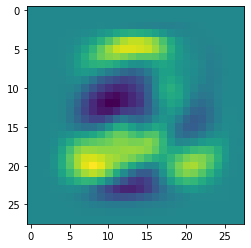

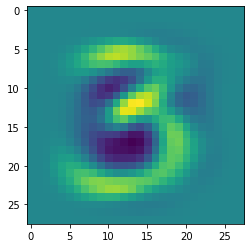

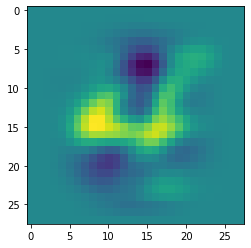

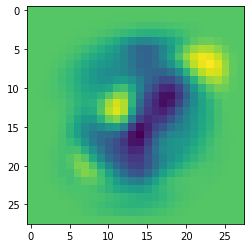

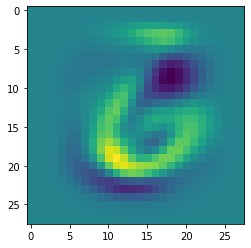

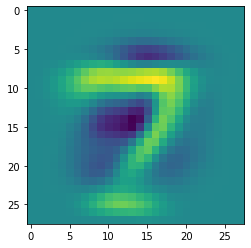

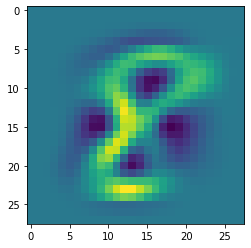

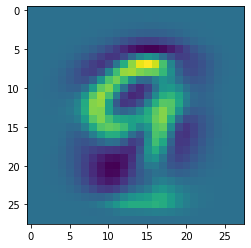

epoch : 900 loss = 1.9669217
accuracy: 0.7687


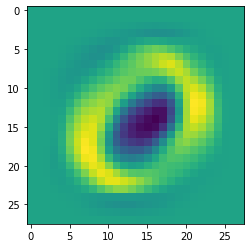

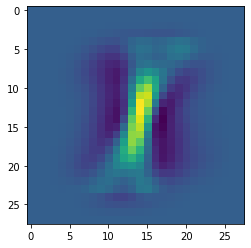

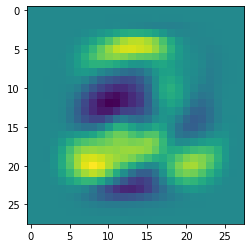

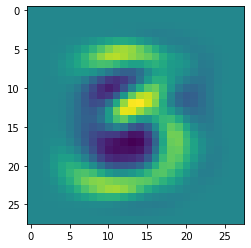

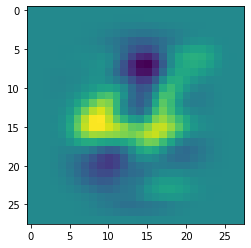

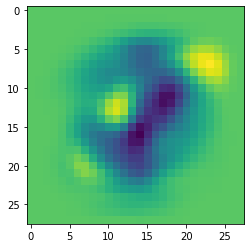

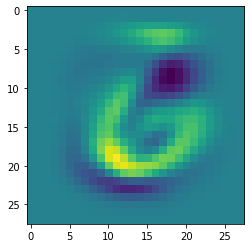

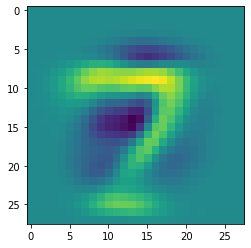

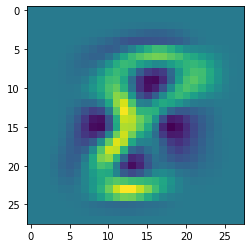

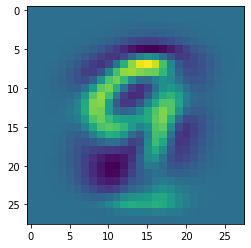

epoch : 1000 loss = 1.8751466
accuracy: 0.7779


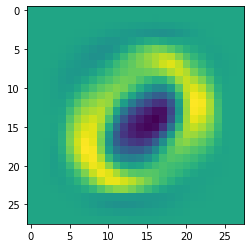

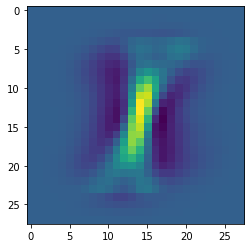

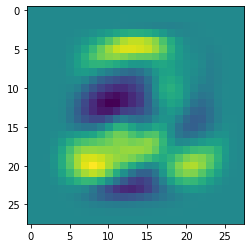

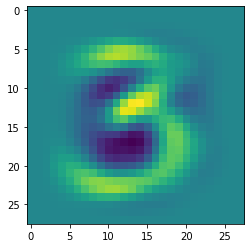

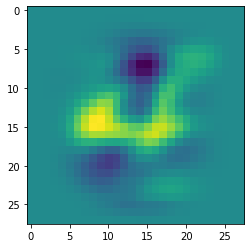

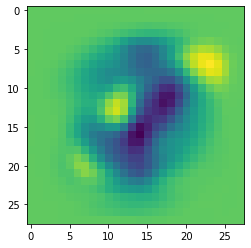

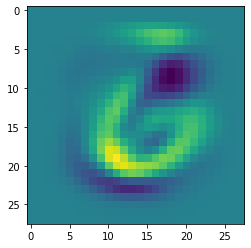

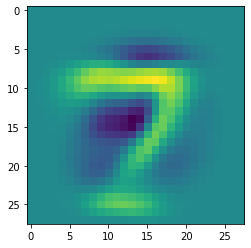

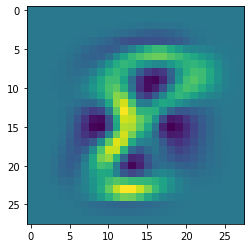

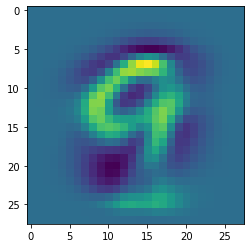

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(totalloss)   
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))             #在測試階段，測試準確度計算
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))         #多個批次的準確度均值

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if(e%100==0 and e!=0):  
        print ("epoch :",e,'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        for i in range(10):  # 繪製10個隱層神經元與輸入層神經元個之間的權重
            im=W_val[:,i].reshape(28,28)  #把矩陣的每一列 變化層 28*28 的矩陣
            plt.imshow(im)  #繪圖
            plt.show()